In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
tf.__version__

'2.3.0'

In [3]:
keras.__version__

'2.4.0'

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [5]:
X_train_full.shape

(60000, 28, 28)

In [6]:
X_train_full.dtype

dtype('uint8')

In [5]:
# 경사 하강법으로 신경망을 훈련하기 때문에 입력 특성의 스케일 조정
# 간편하게 픽셀의 강도를 255.0으로 나누어 0~1사이 범위로 조정

X_vaild, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_vaild, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

In [6]:
# 패션 MNIST는 레이블에 해당하는 아이템을 나타내기 위해
# Class name의 list를 만들어야함
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [9]:
class_names[y_train[0]]

'Coat'

In [10]:
# 층을 하나씩 추가하는 방식
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [11]:
# 층을 추가하지 않고 모델 생성 시 층의 리스트를 전달 방식
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [12]:
# 모델의 summary()
# 모델에 있는 모든 층 출력
# 각 층의 이름, 출력 크기, 파라미터 개수출력
# 마지막에 훈련되는 파라미터와 훈련되지 않은 파라미터를 포함하여 전체 파라미터 개수 출력
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


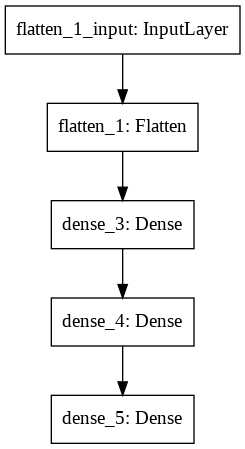

In [13]:
# 모델 구조를 시각화
from keras.utils import plot_model
plot_model(model)

In [14]:
# 모델의 층 리스트 출력
model.layers

In [15]:
# 인덱스로 층 선택
hidden1 = model.layers[1]
hidden1

In [16]:
# 층 이름으로 모델 선택
#model.get_layer('dense_3') is hidden1

In [17]:
# 층의 파라미터는 get_weights(), set_weights() 사용하여 접근 가능
# Dense 층의 경우 연결 가중치와 편향이 모두 포함되어 있다.
weights, biases = hidden1.get_weights()
weights, biases

(array([[-0.03175063,  0.00073275, -0.00438352, ..., -0.06963679,
          0.01461019, -0.02102824],
        [-0.03373979, -0.03971108,  0.02270083, ..., -0.0475894 ,
          0.02135155, -0.06679712],
        [ 0.06419122, -0.03607732,  0.06977531, ..., -0.00154991,
          0.0399884 , -0.0595527 ],
        ...,
        [ 0.05619274,  0.03185824, -0.01986657, ..., -0.00550301,
         -0.01550475, -0.01483449],
        [ 0.02307197,  0.03358205, -0.03847481, ..., -0.05087397,
          0.06058532,  0.01054563],
        [-0.06491687,  0.06347772,  0.04997028, ..., -0.06777063,
          0.06199969,  0.06314562]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [18]:
weights.shape, biases.shape

((784, 300), (300,))

In [19]:
# compile()
# loss = 사용할 손실 함수
# optimizer = 사용할 optimizer
# 부가적으로 훈련과 평가 시에 계산할 지표를 추가 지정 가능
# metrics = ["accuracy"]

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [20]:
# 모델 훈련
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_vaild, y_vaild))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7196 - accuracy: 0.7643 - val_loss: 0.4919 - val_accuracy: 0.8376
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4874 - accuracy: 0.8302 - val_loss: 0.4360 - val_accuracy: 0.8540
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4420 - accuracy: 0.8463 - val_loss: 0.4201 - val_accuracy: 0.8608
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4143 - accuracy: 0.8551 - val_loss: 0.3919 - val_accuracy: 0.8682
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3944 - accuracy: 0.8595 - val_loss: 0.4042 - val_accuracy: 0.8618
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3785 - accuracy: 0.8661 - val_loss: 0.3975 - val_accuracy: 0.8634
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3657 - accuracy: 0.8707 - val_loss: 0.3642 - val_accuracy:

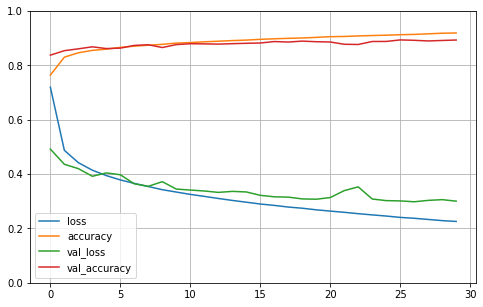

In [21]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # 수직축의 범위를 [0-1] 사이로 설정
plt.show()

In [22]:
# 모델 성능이 만족스럽지 않을때
# 1) 학습률 튜닝
# 2) 다른 옵티마이저를 테스트
# 3) 층 개수, 층의 뉴런 개수, 은닉층이 사용하는 활성화 함수같은 모델의 하이퍼파라미터 튜닝
# 4) 배치 크기 조절

# 상용환경에 배포전 테스트 세트로 모델의 평가하여 일반화 오차를 추정해야한다.
# 테스트 세트에서 하이퍼파라미터 튜닝은 하면 안된다.
# 튜닝 시 일반화 오차를 낙관적으로 추정한다.

# 테스트 세트의 일반화 오차 추정(evaluate)
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3271 - accuracy: 0.8828


[0.32714179158210754, 0.8827999830245972]

In [23]:
# 모델을 사용해 예측
# 새로운 샘플이 없기때문에 테스트세트의 처음 3개 샘플 사용

X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.01, 0.  , 0.98],
       [0.  , 0.  , 0.99, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [24]:
# 예측한 확률에서 가장 높은 확률만 확인
y_pred = model.predict_classes(X_new)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1])

In [25]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

회귀용 다층 퍼셉트론

In [11]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

# 훈련, 테스트 데이터 분리
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target)

# 훈련 검증 데이터 분리
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full)

# 샘플 데이터 정규화

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit_transform(X_valid)
X_test = scaler.fit_transform(X_test)

In [27]:
# 출력층에 활성화 함수를 제외
# 손실함수로 평균제곱오차 사용
# 데이터 셋에 잡음이 많기때문에 과대 적합을 막는 용도로
# 뉴런수가 적은 은닉층 하나 사용

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 0s 1ms/step - loss: 2.5419 - val_loss: 1.1912
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7941 - val_loss: 0.6466
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5618 - val_loss: 0.5667
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5169 - val_loss: 0.5371
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4920 - val_loss: 0.5181
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4730 - val_loss: 0.5056
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4585 - val_loss: 0.4950
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4471 - val_loss: 0.4879
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4377 - val_loss: 0.4810
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4305 - val_loss: 0.4757

(0.0, 1.0)

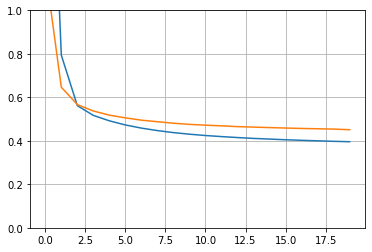

In [28]:
plt.plot(pd.DataFrame(history.history))
plt.grid()
plt.gca().set_ylim(0,1)

함수형 API를 사용해 복잡한 모델 만들기

In [42]:
input_ = keras.layers.Input(shape=X_train.shape[1:])

# 이 층은 만들어지자마자 입력과 함께 함수처럼 호출
# 층 연결 방법을 설정했을뿐 아직 어떤 데이터 처리도 하지 않는다
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)

# 두 번째 은닉층의 출려과 입력을 연결
# 주어진 입력으로 바로 호출
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

In [30]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_8 (Dense)                 (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_9 (Dense)                 (None, 30)           930         dense_8[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_9[0][0]         

In [43]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 1.9494 - val_loss: 0.7298
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6068 - val_loss: 0.6735
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5666 - val_loss: 0.6391
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5363 - val_loss: 0.6082
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5117 - val_loss: 0.5842
Epoch 6/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4931 - val_loss: 0.5688
Epoch 7/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4761 - val_loss: 0.5509
Epoch 8/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4621 - val_loss: 0.5372
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4499 - val_loss: 0.5249
Epoch 10/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4400 - val_loss: 0.5163

In [32]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [33]:
model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
deep_input (InputLayer)         [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense_11 (Dense)                (None, 30)           210         deep_input[0][0]                 
__________________________________________________________________________________________________
wide_input (InputLayer)         [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_12 (Dense)                (None, 30)           930         dense_11[0][0]                   
_______________________________________________________________________________________

In [34]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 2.4141 - val_loss: 1.0332
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.8781 - val_loss: 0.8089
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7054 - val_loss: 0.7459
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6517 - val_loss: 0.7008
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6124 - val_loss: 0.6658
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5806 - val_loss: 0.6378
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5542 - val_loss: 0.6128
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5324 - val_loss: 0.5925
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5140 - val_loss: 0.5769
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4988 - val_loss: 0.5654

In [8]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

In [36]:
model.summary()

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
deep_input (InputLayer)         [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense_13 (Dense)                (None, 30)           210         deep_input[0][0]                 
__________________________________________________________________________________________________
wide_input (InputLayer)         [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_14 (Dense)                (None, 30)           930         dense_13[0][0]                   
_______________________________________________________________________________________

In [12]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

model.compile(loss=["mse","mse"], loss_weights=[0.9, 0.1], 
              optimizer=keras.optimizers.SGD(lr=1e-3))
model.fit((X_train_A, X_train_B), y_train, epochs=20,
          validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 2.5481 - main_output_loss: 2.3771 - aux_output_loss: 4.0877 - val_loss: 1.2723 - val_main_output_loss: 1.0819 - val_aux_output_loss: 2.9865
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 1.0909 - main_output_loss: 0.9352 - aux_output_loss: 2.4929 - val_loss: 0.9486 - val_main_output_loss: 0.8215 - val_aux_output_loss: 2.0926
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.8815 - main_output_loss: 0.7711 - aux_output_loss: 1.8750 - val_loss: 0.8327 - val_main_output_loss: 0.7382 - val_aux_output_loss: 1.6837
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: 0.7987 - main_output_loss: 0.7103 - aux_output_loss: 1.5935 - val_loss: 0.7750 - val_main_output_loss: 0.6946 - val_aux_output_loss: 1.4992
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 0.7504 - main_output_loss: 0.6725 - aux_output_loss: 1.4515 - val_loss

서브클래식 API로 동적 모델 만들기

In [13]:
# 반복문을 포함하고 다양한 크기를 다루어야 하며 조건문을 가지는 등 여러가지 동적인 구조 필요 시
# Model 클래스를 상속한 다음 생성자 안에서 필요한 층을 생성

class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30, activation="relu")

In [14]:
model.summary()

ValueError: ignored

In [15]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 2.3836 - output_1_loss: 2.1663 - output_2_loss: 4.3388 - val_loss: 1.0823 - val_output_1_loss: 0.8240 - val_output_2_loss: 3.4073
Epoch 2/10
363/363 [==============================] - 1s 1ms/step - loss: 0.9660 - output_1_loss: 0.7483 - output_2_loss: 2.9255 - val_loss: 0.8534 - val_output_1_loss: 0.6774 - val_output_2_loss: 2.4376
Epoch 3/10
363/363 [==============================] - 1s 1ms/step - loss: 0.8218 - output_1_loss: 0.6679 - output_2_loss: 2.2069 - val_loss: 0.7684 - val_output_1_loss: 0.6383 - val_output_2_loss: 1.9393
Epoch 4/10
363/363 [==============================] - 1s 1ms/step - loss: 0.7561 - output_1_loss: 0.6369 - output_2_loss: 1.8283 - val_loss: 0.7208 - val_output_1_loss: 0.6155 - val_output_2_loss: 1.6685
Epoch 5/10
363/363 [==============================] - 1s 1ms/step - loss: 0.7173 - output_1_loss: 0.6173 - output_2_loss: 1.6179 - val_loss: 0.6896 - val_output_1_loss: 0.5961 - val_ou

모델 저장과 복원

In [21]:
# keras는 HDF5 포맷을 사용하여 모델 구조와 층의 모든 모델 파라미터를 저장

model.save("my_keras_model.h5")
#model = keras.models.load_model("my_keras_modle.h5")

NotImplementedError: ignored

In [ ]:
# 훈련도중 일정간격으로 체크포인트 저장
# fit()메소드의 callbacks 매개변수를 사용하여 케라스 훈련의 시작, 이나 끝에 호출할 객체 리스트를 지정 가능

# ModelCheckpoint는 훈련하는 동안 일정한 간격으로 모델의 체크포인트를 저장

#checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5")

#history = model.fit(X_train, y_train, epochs=10, callbacks=[checkpoint_cb])

# ModelCheckpoint를 만들 때 save_best_only=True 설정 시
# 최상의 검증 세트 점수에서만 모델을 저장

In [ ]:
# 조기저장 방법
# EarlyStopping 콜백 사용
# 일정 에포크(patience 매개변수로 지정) 동안 검증 세트에 대한 점수가 향상되지 않으면
# 훈련을 중단

#early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

In [ ]:
# 사용자 정의 콜백 함수
# 훈련하는 동안 검증 손실과 훈련 손실의 비율을 출력 
class PrintValTrainRatiocallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

텐서보드를 사용해 시각화

In [ ]:
# 텐서보드는 인터렉티브 시각화 도구
# 훈련하는 동안 학습 곡선을 비교하고 계산 그래프 시각화와 훈련 통계 분석을 수행
# 모델의 이미지를 확인하거나 3D에 투영된 복잡한 다차원 데이터를 시각화하고 자동으로 클러스터링을 해준다

import os
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
  import time
  run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
  return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

In [ ]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[tensorboard_cb])

In [ ]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [ ]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [ ]:
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])
mse_test = keras_reg.score(X_test, y_test)
y_pred = keras_reg.predict(X_new)

In [ ]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100),
    "learning_rate": reciprocal(3e-4, 3e-2),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

In [ ]:
# 랜덤 탐색이 찾은 최상의 하이퍼파라미터
rnd_search_cv.best_params_

In [ ]:
rnd_search_cv.best_score_

In [ ]:
# 훈련되 케라스 모델
model = rnd_search_cv.best_estimator_.model